In [36]:
___Author___='LumberJack Jyss'

In [37]:
print('LumberJack BRUTAL AtidotCom TREND FORECAST\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom TREND FORECAST
LumberJack Jyss (c)


In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df =  pd.read_csv('simanim.csv')

In [40]:
df.head()

Local time  Open_audusd  High_audusd  Low_audusd  \
0  10.04.2004 02:00:00.000 GMT+0200      0.76255      0.76255     0.76255   
1  10.04.2004 03:00:00.000 GMT+0200      0.76255      0.76255     0.76255   
2  10.04.2004 04:00:00.000 GMT+0200      0.76255      0.76255     0.76255   
3  10.04.2004 05:00:00.000 GMT+0200      0.76255      0.76255     0.76255   
4  10.04.2004 06:00:00.000 GMT+0200      0.76255      0.76255     0.76255   

   Close_audusd  Volume_audusd  Open_usdjpy  High_usdjpy  Low_usdjpy  \
0       0.76255            0.0       106.39       106.39      106.39   
1       0.76255            0.0       106.39       106.39      106.39   
2       0.76255            0.0       106.39       106.39      106.39   
3       0.76255            0.0       106.39       106.39      106.39   
4       0.76255            0.0       106.39       106.39      106.39   

   Close_usdjpy  ...  Low_eurusd  Close_eurusd  Volume_eurusd  \
0        106.39  ...     1.20888       1.20888            0.0   
1        106.39  ...     1.20888       1.20888            0.0   
2        106.39  ...     1.20888       1.20888            0.0   
3        106.39  ...     1.20888       1.20888            0.0   
4        106.39  ...     1.20888       1.20888            0.0   

   Macdsignal_eurusd  rsi_eurusd  BBup_eurusd  BBmid_eurusd  BBlow_eurusd  \
0          -0.003009   37.355005     1.210666      1.209442      1.208217   
1          -0.003035   37.355005     1.210610      1.209471      1.208331   
2          -0.003060   37.355005     1.210553      1.209414      1.208275   
3          -0.003084   37.355005     1.210526      1.209373      1.208219   
4          -0.003107   37.355005     1.210429      1.209311      1.208192   

   atr_eurusd  wclprince_eurusd  
0    0.001222           1.20888  
1    0.001134           1.20888  
2    0.001053           1.20888  
3    0.000978           1.20888  
4    0.000908           1.20888  

[5 rows x 43 columns]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131566 entries, 0 to 131565
Data columns (total 43 columns):
Local time           131566 non-null object
Open_audusd          131566 non-null float64
High_audusd          131566 non-null float64
Low_audusd           131566 non-null float64
Close_audusd         131566 non-null float64
Volume_audusd        131566 non-null float64
Open_usdjpy          131566 non-null float64
High_usdjpy          131566 non-null float64
Low_usdjpy           131566 non-null float64
Close_usdjpy         131566 non-null float64
Volume_usdjpy        131566 non-null float64
Open_gbpusd          131566 non-null float64
High_gbpusd          131566 non-null float64
Low_gbpusd           131566 non-null float64
Close_gbpusd         131566 non-null float64
Volume_gbpusd        131566 non-null float64
Open_nzdusd          131566 non-null float64
High_nzdusd          131566 non-null float64
Low_nzdusd           131566 non-null float64
Close_nzdusd         131566 non-nul

In [42]:
df.shape

(131566, 43)

In [ ]:
trend_label = []
var_list = []
target = 0.001
stop_loss = - 0.004
equity_list = []
equity = 100000
pos = 0

import sys

orig_stdout = sys.stdout
f = open('out.txt', 'w')
sys.stdout = f


for i in range(0,df.shape[0]):
    print('\nCompteur de ligne :',i)
    print('Date :',df.iloc[i,0])
    
    
    candle_close = float(df.iloc[i,34])
    candle_open = float(df.iloc[i,31])
    candle_high = float(df.iloc[i,32])
    candle_low = float(df.iloc[i,33])
    
    if pos == 0:
        price_buy = candle_open
        equity = equity - 3.
        equity_list.append(equity)
        trend_label.append(0)
        var_list.append(0)
        print('\nDate :',df.iloc[i,0])
        print('nouverture position long à ',price_buy)
        pos = 1

    
    if pos ==1:
        var = candle_close - price_buy
        if var > target : #and alerte < stop_loss :
            equity = equity + var*100000 - 3
            equity_list.append(equity)
            p = 0
            trend_label.append(1)
            var_list.append(var)
            print('\nDate :',df.iloc[i,0])
            print('short la position ouverte a',candle_close)
            print('profit généré', var)
            print('Target à ',target)
        
        else :
            trend_label.append(0)
            var_list.append(var)
            equity_list.append(0)
            pos = 1
            print('\nDate :',df.iloc[i,0])
            print('Il ne se passe rien')
            print('le profit serait de', (candle_close - price_buy))
            print('Target à ',target)
        

        sys.stdout = orig_stdout
f.close()

var_dtf = pd.DataFrame()
var_dtf['Variations'] = var_list
var_dtf['Equity'] = equity_list

 
    


Compteur de ligne : 1
Date : 10.04.2004 03:00:00.000 GMT+0200

Date : 10.04.2004 03:00:00.000 GMT+0200
Il ne se passe rien
le profit serait de 0.0
Target à  0.001

Compteur de ligne : 2
Date : 10.04.2004 04:00:00.000 GMT+0200

Date : 10.04.2004 04:00:00.000 GMT+0200
Il ne se passe rien
le profit serait de 0.0
Target à  0.001

Compteur de ligne : 3
Date : 10.04.2004 05:00:00.000 GMT+0200

Date : 10.04.2004 05:00:00.000 GMT+0200
Il ne se passe rien
le profit serait de 0.0
Target à  0.001

Compteur de ligne : 4
Date : 10.04.2004 06:00:00.000 GMT+0200

Date : 10.04.2004 06:00:00.000 GMT+0200
Il ne se passe rien
le profit serait de 0.0
Target à  0.001

Compteur de ligne : 5
Date : 10.04.2004 07:00:00.000 GMT+0200

Date : 10.04.2004 07:00:00.000 GMT+0200
Il ne se passe rien
le profit serait de 0.0
Target à  0.001

Compteur de ligne : 6
Date : 10.04.2004 08:00:00.000 GMT+0200

Date : 10.04.2004 08:00:00.000 GMT+0200
Il ne se passe rien
le profit serait de 0.0
Target à  0.001

Compteur de lig

In [21]:
len(var_list),len(equity_list),len(trend_label),len(df.index)

(131565, 131565, 131565, 131565)

In [22]:
sum(trend_label)

167

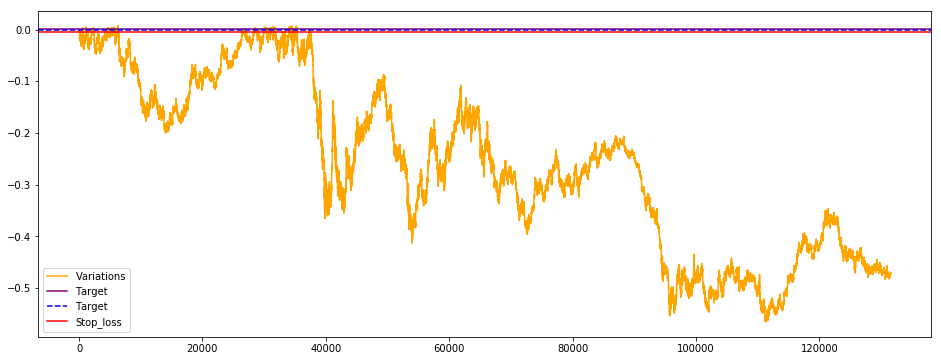

In [23]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Variations'],color='orange',label='Variations')
plt.axhline(y=target, color='purple',linestyle='-', label='Target')
plt.axhline(y=0, color='blue',linestyle='--', label='Target')
plt.axhline(y=stop_loss,color='r',label='Stop_loss')
plt.legend()

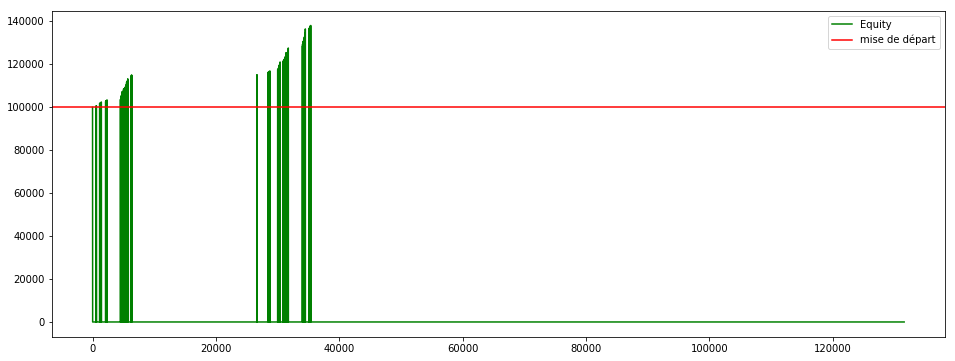

In [24]:
plt.figure(figsize=(16,6))
plt.plot(var_dtf['Equity'],color='green',label='Equity')
plt.axhline(y=100000., color='red',linestyle='-', label='mise de départ')
plt.legend()

In [25]:
df['trend'] = trend_label

In [26]:
print('Nombre de positions de long trouvées :',sum(trend_label),'sur un total de ',len(trend_label))

Nombre de positions de long trouvées : 167 sur un total de  131565


In [27]:
print('Sur un achat systématique, les gains représentent',round((sum(trend_label)/len(trend_label))*100,2),'%')

Sur un achat systématique, les gains représentent 0.13 %


In [28]:
df['trend'] = df['trend'].shift(-1)

In [29]:
df.tail()

Local time  Open_audusd  High_audusd  \
131560  13.04.2019 18:00:00.000 GMT+0200      0.71749      0.71749   
131561  13.04.2019 19:00:00.000 GMT+0200      0.71749      0.71749   
131562  13.04.2019 20:00:00.000 GMT+0200      0.71749      0.71749   
131563  13.04.2019 21:00:00.000 GMT+0200      0.71749      0.71749   
131564  13.04.2019 22:00:00.000 GMT+0200      0.71749      0.71749   

        Low_audusd  Close_audusd  Volume_audusd  Open_usdjpy  High_usdjpy  \
131560     0.71749       0.71749            0.0      112.041      112.041   
131561     0.71749       0.71749            0.0      112.041      112.041   
131562     0.71749       0.71749            0.0      112.041      112.041   
131563     0.71749       0.71749            0.0      112.041      112.041   
131564     0.71749       0.71749            0.0      112.041      112.041   

        Low_usdjpy  Close_usdjpy  ...  Close_eurusd  Volume_eurusd  \
131560     112.041       112.041  ...       1.13006            0.0   
131561     112.041       112.041  ...       1.13006            0.0   
131562     112.041       112.041  ...       1.13006            0.0   
131563     112.041       112.041  ...       1.13006            0.0   
131564     112.041       112.041  ...       1.13006            0.0   

        Macdsignal_eurusd  rsi_eurusd  BBup_eurusd  BBmid_eurusd  \
131560           0.002621    47.79156      1.13006       1.13006   
131561           0.002625    47.79156      1.13006       1.13006   
131562           0.002628    47.79156      1.13006       1.13006   
131563           0.002630    47.79156      1.13006       1.13006   
131564           0.002630    47.79156      1.13006       1.13006   

        BBlow_eurusd  atr_eurusd  wclprince_eurusd  trend  
131560       1.13006    0.000226           1.13006    0.0  
131561       1.13006    0.000210           1.13006    0.0  
131562       1.13006    0.000195           1.13006    0.0  
131563       1.13006    0.000181           1.13006    0.0  
131564       1.13006    0.000168           1.13006    NaN  

[5 rows x 44 columns]

In [30]:
df = df.dropna()
df.tail()

Local time  Open_audusd  High_audusd  \
131559  13.04.2019 17:00:00.000 GMT+0200      0.71749      0.71749   
131560  13.04.2019 18:00:00.000 GMT+0200      0.71749      0.71749   
131561  13.04.2019 19:00:00.000 GMT+0200      0.71749      0.71749   
131562  13.04.2019 20:00:00.000 GMT+0200      0.71749      0.71749   
131563  13.04.2019 21:00:00.000 GMT+0200      0.71749      0.71749   

        Low_audusd  Close_audusd  Volume_audusd  Open_usdjpy  High_usdjpy  \
131559     0.71749       0.71749            0.0      112.041      112.041   
131560     0.71749       0.71749            0.0      112.041      112.041   
131561     0.71749       0.71749            0.0      112.041      112.041   
131562     0.71749       0.71749            0.0      112.041      112.041   
131563     0.71749       0.71749            0.0      112.041      112.041   

        Low_usdjpy  Close_usdjpy  ...  Close_eurusd  Volume_eurusd  \
131559     112.041       112.041  ...       1.13006            0.0   
131560     112.041       112.041  ...       1.13006            0.0   
131561     112.041       112.041  ...       1.13006            0.0   
131562     112.041       112.041  ...       1.13006            0.0   
131563     112.041       112.041  ...       1.13006            0.0   

        Macdsignal_eurusd  rsi_eurusd  BBup_eurusd  BBmid_eurusd  \
131559           0.002616    47.79156      1.13006       1.13006   
131560           0.002621    47.79156      1.13006       1.13006   
131561           0.002625    47.79156      1.13006       1.13006   
131562           0.002628    47.79156      1.13006       1.13006   
131563           0.002630    47.79156      1.13006       1.13006   

        BBlow_eurusd  atr_eurusd  wclprince_eurusd  trend  
131559       1.13006    0.000244           1.13006    0.0  
131560       1.13006    0.000226           1.13006    0.0  
131561       1.13006    0.000210           1.13006    0.0  
131562       1.13006    0.000195           1.13006    0.0  
131563       1.13006    0.000181           1.13006    0.0  

[5 rows x 44 columns]

In [31]:
df['trend'].sum()

167.0

In [48]:
df.to_csv('dataset_ready_to_use.csv')